In [1]:
import pandas as pd
import numpy as np 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [6]:
tree_data = pd.read_csv("2015_Street_Tree_Census_-_Tree_Data.csv")
tree_data.shape

(683788, 45)

In [8]:
demo= pd.read_csv("NewYork.csv")
demo.shape

(4906, 125)

In [10]:
def f(row):
    if row['COUNTY'] == 'New York' :
        val = 1
    elif row['COUNTY'] == 'Bronx' :
        val = 2
    elif row['COUNTY'] == 'Kings' :
        val = 3
    elif row['COUNTY'] == 'Queens' :
        val = 4
    elif row['COUNTY'] == 'Richmond' :
        val = 5
    else:
        val = -1
    return val

In [11]:
demo['borocode'] = demo.apply(f, axis=1)
demo = demo[demo.borocode != -1]
demo2 = demo[["borocode",'AREA_SQMI',"FIPS",'EP_POV',"EP_UNEMP","EP_PCI",'EP_NOHSDP','EP_AGE65','EP_AGE17','EP_SNGPNT']]

In [12]:
demo2_features = demo2.iloc[:,3:11]

In [13]:
#STCNTY',"COUNTY",'EP_POV',"EP_UNEMP","EP_PCI",'EP_NOHSDP','EP_AGE65','EP_AGE17','EP_SNGPNT'

In [14]:
def dist_Plot(data):
  fig, ax = plt.subplots(2,4, figsize=(16,8))                 
  sns.set()
  sns.distplot(data.EP_POV, bins = 15, ax=ax[0,0]) 
  sns.distplot(data.EP_UNEMP, bins = 15, ax=ax[0,1])
  sns.distplot(data.EP_PCI, bins = 15, ax=ax[0,2]) 
  sns.distplot(data.EP_NOHSDP, bins = 15, ax=ax[0,3]) 
  sns.distplot(data.EP_AGE65, bins = 15, ax=ax[1,0]) 
  sns.distplot(data.EP_AGE17, bins = 15, ax=ax[1,1]) 
  sns.distplot(data.EP_SNGPNT, bins = 15, ax=ax[1,2])
  fig.suptitle("Gaussian Distribution of all features")
  fig.tight_layout()          

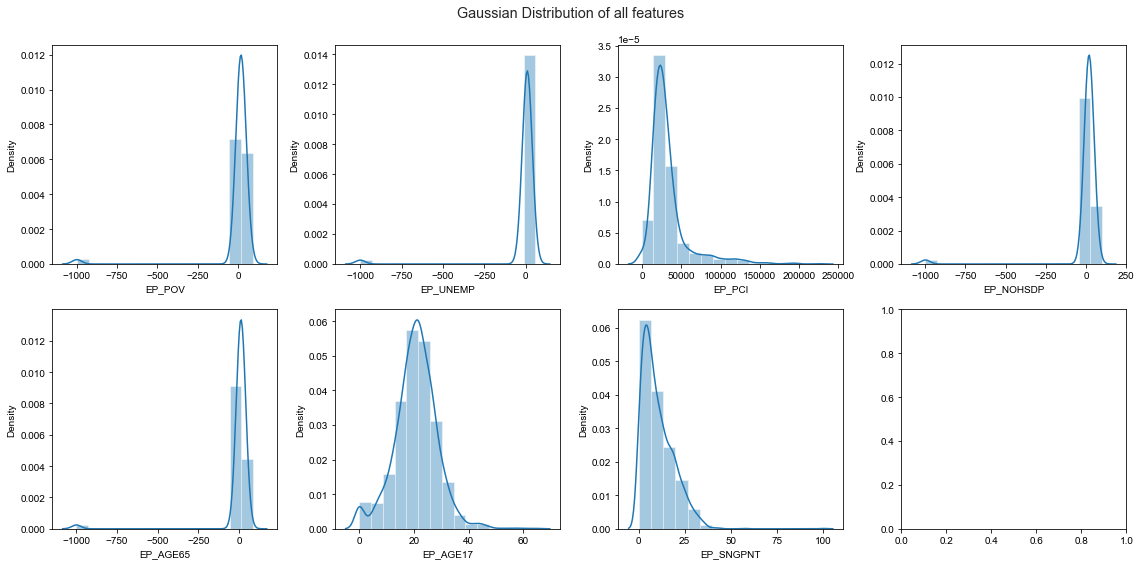

In [15]:
dist_Plot(demo2_features)

In [16]:
def box_Plot(data):
    fig, ax = plt.subplots(2,4, figsize=(16,8))                 
    sns.set()
    sns.boxplot(data.EP_POV,ax=ax[0,0]) 
    sns.boxplot(data.EP_UNEMP,ax=ax[0,1])
    sns.boxplot(data.EP_PCI,ax=ax[0,2]) 
    sns.boxplot(data.EP_NOHSDP,ax=ax[0,3]) 
    sns.boxplot(data.EP_AGE65,ax=ax[1,0]) 
    sns.boxplot(data.EP_AGE17,ax=ax[1,1]) 
    sns.boxplot(data.EP_SNGPNT,ax=ax[1,2])
    fig.suptitle("Box Plot of all features")
    fig.tight_layout()          

In [17]:
demo2_features.describe()

,EP_POV,EP_UNEMP,EP_PCI,EP_NOHSDP,EP_AGE65,EP_AGE17,EP_SNGPNT
count,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000
mean,-0.014127,-10.746307,32552.852724,1.444691,-4.580840,20.660249,10.473684
std,139.388644,139.091426,25861.518875,134.258030,133.082027,7.862728,8.484789
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000
25%,8.725000,5.200000,18840.000000,9.900000,8.800000,16.400000,4.000000
50%,16.000000,7.800000,25806.500000,16.900000,12.000000,21.000000,8.200000
75%,26.200000,11.300000,35522.500000,27.000000,16.100000,25.300000,15.575000
max,89.700000,56.400000,227095.000000,100.000000,87.200000,64.700000,100.000000


In [19]:
# remove missing data
for i in demo2_features.columns.values:
    x = np.where((demo2[i]==-999) | (demo2[i]== 0))
    demo2.drop(demo2.index[x], inplace=True)

In [20]:
# manual outlier rejection
def Manual (data):
    for i in range(3):
        m = data.EP_POV.max()
        data = data[data.EP_POV!=m]
    for i in range(10):
        m = data.EP_UNEMP.max()
        data = data[data.EP_UNEMP!=m]
    for i in range(8):
        m = data.EP_PCI.max()
        data = data[data.EP_PCI!=m]
    for i in range(5):
        m = data.EP_NOHSDP.max()
        data = data[data.EP_NOHSDP!=m]
    for i in range(10):
        m = data.EP_AGE65.max()
        data = data[data.EP_AGE65!=m]
    for i in range(13):
        m = data.EP_AGE17.max()
        data = data[data.EP_AGE17!=m]
    for i in range(8):
        m = data.EP_AGE17.min()
        data = data[data.EP_AGE17!=m]
    for i in range(8):
        m = data.EP_SNGPNT.max()
        data = data[data.EP_SNGPNT!=m]
    return data

In [21]:
demo3 = Manual(demo2)
demo3.shape

(1987, 10)

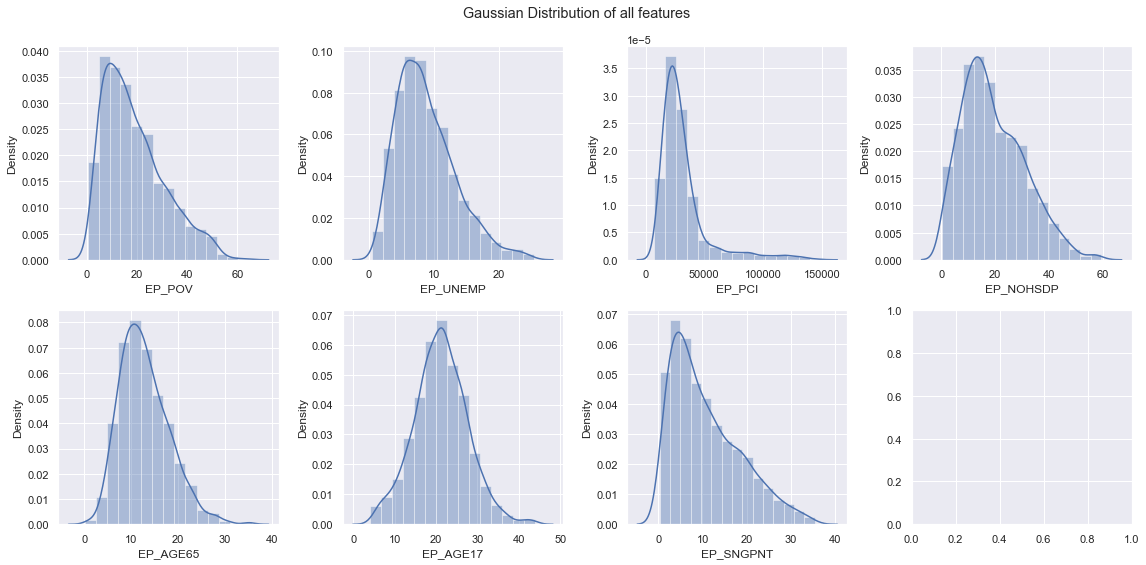

In [22]:
dist_Plot(demo3)

In [24]:
l=[]
for i in range(demo3.shape[0]):
    s = int(str(demo3['borocode'].iloc[i]) + str(demo3['FIPS'].iloc[i])[5:12])
    l.append(s)
demo3['boro_ct'] =l

In [25]:
demo3.head(5)

,borocode,AREA_SQMI,FIPS,EP_POV,EP_UNEMP,EP_PCI,EP_NOHSDP,EP_AGE65,EP_AGE17,EP_SNGPNT,boro_ct
122,2,0.185122,36005000200,15.8,6.8,22544.0,22.9,14.1,20.5,15.9,2000200
123,2,0.297565,36005000400,11.8,9.0,28780.0,15.4,10.5,21.6,16.5,2000400
124,2,0.187290,36005001600,28.8,8.4,14229.0,29.6,15.5,27.1,25.6,2001600
125,2,0.152728,36005002000,52.4,17.1,11316.0,37.3,11.0,27.6,29.9,2002000
126,2,0.040404,36005002300,48.4,17.4,10937.0,44.7,13.7,29.8,29.8,2002300


In [44]:
master = pd.merge(tree_data, demo3, on= 'boro_ct')

In [45]:
master.shape

(651385, 55)

In [46]:
master.columns.values

array(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common',
       'steward', 'guards', 'sidewalk', 'user_type', 'problems',
       'root_stone', 'root_grate', 'root_other', 'trunk_wire',
       'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe',
       'brch_other', 'address', 'postcode', 'zip_city', 'community board',
       'borocode_x', 'borough', 'cncldist', 'st_assem', 'st_senate',
       'nta', 'nta_name', 'boro_ct', 'state', 'latitude', 'longitude',
       'x_sp', 'y_sp', 'council district', 'census tract', 'bin', 'bbl',
       'borocode_y', 'AREA_SQMI', 'FIPS', 'EP_POV', 'EP_UNEMP', 'EP_PCI',
       'EP_NOHSDP', 'EP_AGE65', 'EP_AGE17', 'EP_SNGPNT'], dtype=object)

In [47]:
master.head(5)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,borocode_y,AREA_SQMI,FIPS,EP_POV,EP_UNEMP,EP_PCI,EP_NOHSDP,EP_AGE65,EP_AGE17,EP_SNGPNT
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4,0.0866,36081073900,6.6,4.6,51560.0,5.1,19.1,19.9,6.4
1,179127,348611,08/27/2015,32,0,OnCurb,Alive,Good,Liriodendron tulipifera,tulip-poplar,...,4,0.0866,36081073900,6.6,4.6,51560.0,5.1,19.1,19.9,6.4
2,180699,348714,08/27/2015,21,0,OnCurb,Alive,Fair,Gleditsia triacanthos var. inermis,honeylocust,...,4,0.0866,36081073900,6.6,4.6,51560.0,5.1,19.1,19.9,6.4
3,180679,348711,08/27/2015,3,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,4,0.0866,36081073900,6.6,4.6,51560.0,5.1,19.1,19.9,6.4
4,179181,348542,08/27/2015,7,0,OnCurb,Alive,Good,Acer platanoides,Norway maple,...,4,0.0866,36081073900,6.6,4.6,51560.0,5.1,19.1,19.9,6.4


In [48]:
# data cleaning for the master 

In [49]:
# check NAs for each column
master.isna().sum()

tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              30086
spc_latin           30089
spc_common          30089
steward             30085
guards              30086
sidewalk            30086
user_type               0
problems            30134
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode_x              0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state                   0
latitude                0
longitude   

In [50]:
master2= master.dropna(subset=['health', 'spc_latin', 'spc_common','steward','guards', 'sidewalk','problems'])

In [51]:
master2 = master2.drop(['council district'], axis=1)
master2 = master2.drop(['census tract'], axis=1)
master2 = master2.drop(['bin'], axis=1)
master2 = master2.drop(['bbl'], axis=1)

In [52]:
master2['status'].value_counts()

Alive    621245
Name: status, dtype: int64

In [53]:
# remove the outliers for continous feature
# there's only one continuous variable, which is the diameter of the tree

<AxesSubplot: xlabel='tree_dbh', ylabel='Density'>

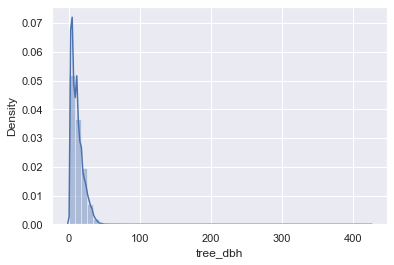

In [55]:
sns.distplot(master2.tree_dbh)

In [56]:
master3 = master2.loc[master2['tree_dbh']<=50]

<AxesSubplot: xlabel='tree_dbh', ylabel='Density'>

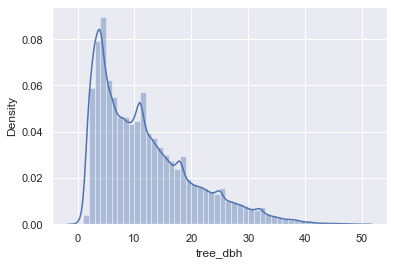

In [57]:
sns.distplot(master3.tree_dbh)

In [58]:
master3.shape

(620896, 51)

In [59]:
master3 = master3.drop(['stump_diam'], axis=1)

In [60]:
master3.to_csv('master.csv', index=False)

In [61]:
data = master3

In [62]:
df = data.groupby(['boro_ct'])['boro_ct'].count().reset_index(name="tree_count")

In [63]:
df

,boro_ct,tree_count
0,1000201,66
1,1000202,210
2,1000600,164
3,1000700,130
4,1000800,281
...,...,...
1980,5030301,553
1981,5030302,730
1982,5031901,384
1983,5031902,479


In [64]:
# find the tree count in each boro_ct
# percentage of trees on_curb
# percentage of good tree
# percentage of bad tree
# percentage of fair tree
# number of unique species
# percentage of sidewalk damage

In [65]:
d = data.loc[data['curb_loc'] == 'OnCurb'].groupby('boro_ct')['curb_loc'].count().reset_index(name="oncurb_count")

In [66]:
d

,boro_ct,oncurb_count
0,1000201,59
1,1000202,145
2,1000600,149
3,1000700,94
4,1000800,197
...,...,...
1980,5030301,533
1981,5030302,695
1982,5031901,360
1983,5031902,458


In [67]:
df['percent_oncurb']= d["oncurb_count"]*100/df["tree_count"]

In [68]:
df.head(3)

,boro_ct,tree_count,percent_oncurb
0,1000201,66,89.393939
1,1000202,210,69.047619
2,1000600,164,90.853659


In [69]:
d = data.loc[data['health'] == 'Good'].groupby('boro_ct')['health'].count().reset_index(name="good_count")
df = pd.merge(df, d, on= 'boro_ct')
d = data.loc[data['health'] == 'Poor'].groupby('boro_ct')['health'].count().reset_index(name="poor_count")
df = pd.merge(df, d, on= 'boro_ct')
d = data.loc[data['health'] == 'Fair'].groupby('boro_ct')['health'].count().reset_index(name="fair_count")
df = pd.merge(df, d, on= 'boro_ct')

In [70]:
df

,boro_ct,tree_count,percent_oncurb,good_count,poor_count,fair_count
0,1000201,66,89.393939,46,9,11
1,1000202,210,69.047619,162,9,39
2,1000600,164,90.853659,124,11,29
3,1000700,130,72.307692,59,14,57
4,1000800,281,70.106762,217,12,52
...,...,...,...,...,...,...
1920,5030301,553,96.383363,523,16,14
1921,5030302,730,95.205479,637,30,63
1922,5031901,384,93.750000,335,12,37
1923,5031902,479,95.615866,315,49,115


In [71]:
df['percent_goodhealth']= df["good_count"]*100/df["tree_count"]
df['percent_fairhealth']= df["fair_count"]*100/df["tree_count"]
df['percent_poorhealth']= df["poor_count"]*100/df["tree_count"]

In [72]:
df = df.drop(['good_count'], axis=1)
df = df.drop(['poor_count'], axis=1)
df= df.drop(['fair_count'], axis=1)

In [73]:
d = data.groupby(['boro_ct'])['spc_common'].nunique().reset_index(name="num_species")

In [74]:
df = pd.merge(df, d, on= 'boro_ct')

In [75]:
d = data.loc[data['sidewalk'] == 'Damage'].groupby('boro_ct')['sidewalk'].count().reset_index(name="damage_count")
df = pd.merge(df, d, on= 'boro_ct')
df['percent_damaged']= df["damage_count"]*100/df["tree_count"]
df = df.drop(['damage_count'], axis=1)

In [77]:
df = pd.merge(df, demo3, on= 'boro_ct')

In [78]:
df = df.drop(['AREA_SQMI'], axis=1)
df = df.drop(["FIPS"], axis=1)

In [79]:
df2=df

In [80]:
df.shape

(1923, 16)

In [81]:
# clean the data set

<AxesSubplot: xlabel='tree_count', ylabel='Density'>

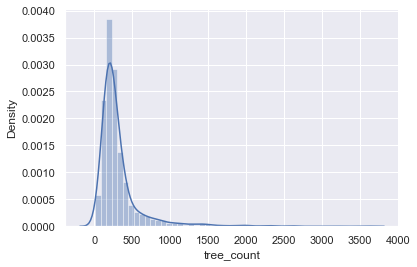

In [82]:
sns.distplot(df['tree_count'])

In [83]:
df= df.loc[df['tree_count']<800]

In [84]:
df.shape

(1811, 16)

<AxesSubplot: xlabel='percent_oncurb', ylabel='Density'>

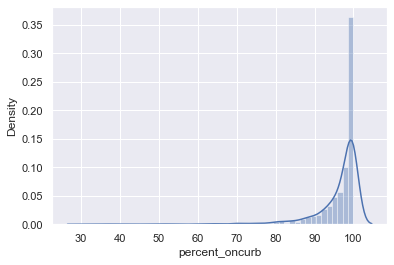

In [85]:
sns.distplot(df['percent_oncurb'])

In [86]:
df = df.loc[df['percent_oncurb']>80]

In [87]:
df.shape

(1752, 16)

<AxesSubplot: xlabel='percent_goodhealth', ylabel='Density'>

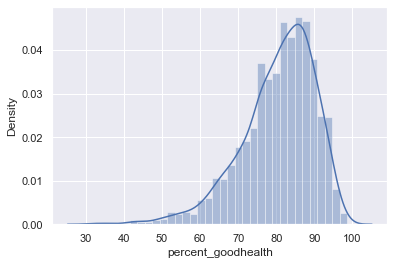

In [88]:
sns.distplot(df['percent_goodhealth'])

In [89]:
df.shape

(1752, 16)

In [90]:
df = df.loc[df['percent_goodhealth']>45]

<AxesSubplot: xlabel='percent_fairhealth', ylabel='Density'>

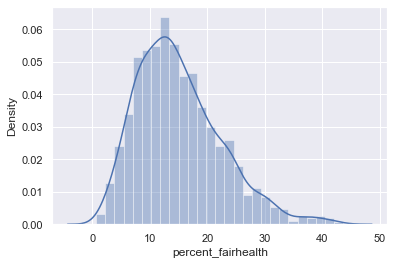

In [91]:
sns.distplot(df['percent_fairhealth'])

In [92]:
df = df.loc[df['percent_fairhealth']<40]

<AxesSubplot: xlabel='percent_poorhealth', ylabel='Density'>

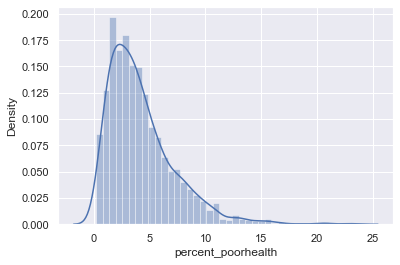

In [93]:
sns.distplot(df['percent_poorhealth'])

In [94]:
df = df.loc[df['percent_poorhealth']<13]

In [95]:
df.shape

(1707, 16)

<AxesSubplot: xlabel='num_species', ylabel='Density'>

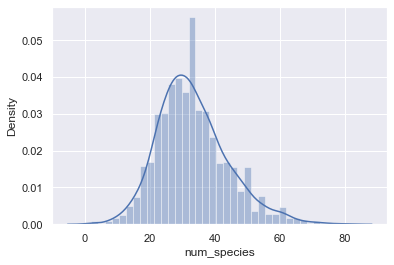

In [96]:
sns.distplot(df['num_species'])


In [97]:
df = df.loc[ (df['num_species']>5) & (df['num_species']<70)]

In [98]:
df.shape

(1697, 16)

<AxesSubplot: xlabel='percent_damaged', ylabel='Density'>

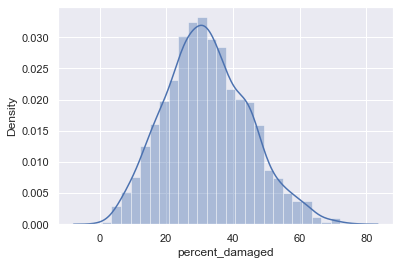

In [99]:
sns.distplot(df["percent_damaged"])

In [100]:
df = df.loc[ (df["percent_damaged"]> 3) & (df["percent_damaged"]<65)]

In [101]:
df.shape

(1684, 16)

In [102]:
df.to_csv('tree_demo.csv', index=False)